# FIR Filter Parameters

In [1]:
import numpy as np 
from numpy.fft import fft,ifft,fftshift
import matplotlib.pyplot as plt


In [2]:
# Anfangs werte noch variabel machen 
delays = [3,5,2]
ampl = [0.2,0.5,0.8]

In [3]:
#if len(delays)!= len(ampl):
# Exeption ? 

In [4]:
[1]+[0 for n in range (0,delays[0])]+[ampl[0]]

[1, 0, 0, 0, 0.2]

In [5]:
i = len(ampl)
x = [([1]+[0 for n in range (0,delays[i])]+[ampl[i]]) for i in range(0,i)]

# Dealy Window


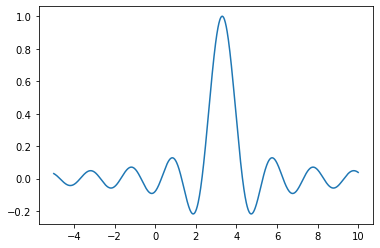

In [6]:
d = 3.3
k = np.linspace(-5,10,1000)
h_ideal = np.sinc(k-d)
plt.plot(k,h_ideal)
plt.show()



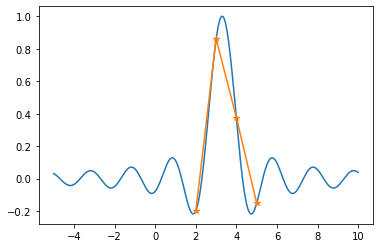

In [7]:
n = 4.5
window_sample= np.arange(np.round(d-(n-1)/2),np.round(d+(n+1)/2))
window = []
for ws in window_sample:  
    idx = (np.abs(k-ws)).argmin()
    window.append(idx)
    
plt.plot(k,h_ideal)
plt.plot(window_sample,h_ideal[window],"-*")
plt.show()

# FIR

In [8]:
delay = 3
amplitude = 1

d_int = int(np.floor(delay))
d_frac = delay - d_int

h_int = np.concatenate([np.zeros(d_int-1), [amplitude], np.zeros(3)])

In [9]:
H_int = fft(h_int)
h = ifft(H_int)

<StemContainer object of 3 artists>

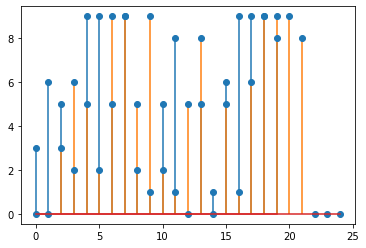

In [10]:
test = np.random.randint(0, 10, size = 20)
y = np.convolve(test.real, h_int)

plt.stem(test, linefmt="C0-")
plt.stem(y, linefmt='C1-')

In [11]:
test

array([3, 6, 5, 2, 9, 9, 5, 9, 2, 1, 5, 8, 0, 5, 1, 6, 9, 9, 9, 8])

In [12]:
h_int

array([0., 0., 1., 0., 0., 0.])

In [13]:
y

array([0., 0., 3., 6., 5., 2., 9., 9., 5., 9., 2., 1., 5., 8., 0., 5., 1.,
       6., 9., 9., 9., 8., 0., 0., 0.])

# FIR mit Delay 


System frequencies fs=10, T=0.1
Tap with amplitude=4, delay=0.7250000000000001
Creating filter of order N=15.0


<StemContainer object of 3 artists>

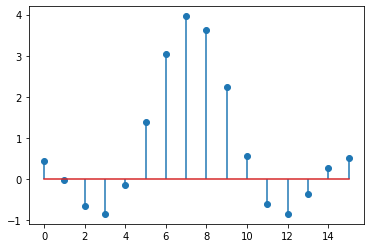

In [14]:
samp_rate = 10
period = 1 / samp_rate
print(f"System frequencies fs={samp_rate}, T={period}")

delay = 7.25 * period
ampl = 4
print(f"Tap with amplitude={ampl}, delay={delay}")

order = 2 * np.floor(delay / period) + 1 #N
print(f"Creating filter of order N={order}")

skip = np.floor(delay / period) - (order - 1) / 2 #M
assert skip >= 0

samples = np.arange(0, order + 1) * period - delay
h = ampl*(np.sin(samp_rate * samples) / (samp_rate * samples)) #sinc

plt.stem(h)

<StemContainer object of 3 artists>

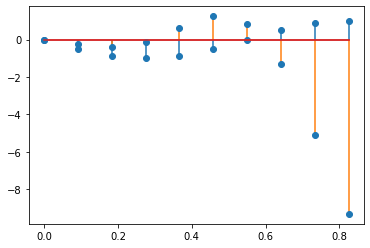

In [15]:
t = np.linspace(0, delay + period, samp_rate)
f = np.sin(2 * np.pi * samp_rate * t)

f_shift = np.convolve(h, f)[:len(f)]

plt.stem(t, f, linefmt="C0-")
plt.stem(t, f_shift, linefmt='C1-')

#  Test Delay  

System frequencies fs=10, T=0.1
Tap with amplitude=4, delay_freq=0.7250000000000001, delay_int=7
Creating filter of order N=15.0
samples_freq[-0.725 -0.625 -0.525 -0.425 -0.325 -0.225 -0.125 -0.025  0.075  0.175
  0.275  0.375  0.475  0.575  0.675  0.775]
samples_int[0 1 2 3 4 5 6]
h_freq[ 0.45411359 -0.0212347  -0.65442628 -0.84234293 -0.13316324  1.38324124
  3.03675078  3.95846335  3.63540672  2.24911074  0.55514326 -0.60966541
 -0.84150972 -0.35358545  0.26669278  0.51334131]
h_ideal[ 3.10262780e-02  2.99830750e-02  2.88692595e-02  2.76870500e-02
  2.64388245e-02  2.51271158e-02  2.37546068e-02  2.23241246e-02
  2.08386353e-02  1.93012375e-02  1.77151562e-02  1.60837364e-02
  1.44104353e-02  1.26988161e-02  1.09525398e-02  9.17535764e-03
  7.37110346e-03  5.54368515e-03  3.69707648e-03  1.83530854e-03
 -3.75389411e-05 -1.91734645e-03 -3.79996360e-03 -5.68121819e-03
 -7.55692534e-03 -9.42289669e-03 -1.12749496e-02 -1.31089164e-02
 -1.49206538e-02 -1.67060518e-02 -1.84610433e-02 -2.0

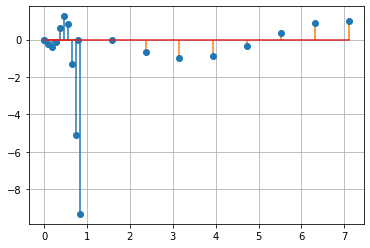

<StemContainer object of 3 artists>

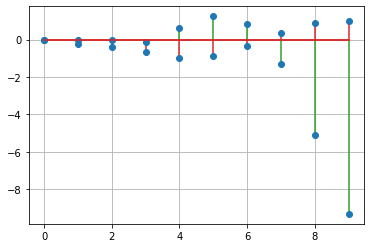

In [19]:
samp_rate = 10
period = 1 / samp_rate
print(f"System frequencies fs={samp_rate}, T={period}")

delay_freq = 7.25 * period
delay_int = int(np.floor(delay_freq/period))
ampl = 4
print(f"Tap with amplitude={ampl}, delay_freq={delay_freq}, delay_int={delay_int}")

order = 2 * np.floor(delay / period) + 1 #N
print(f"Creating filter of order N={order}")

skip = np.floor(delay / period) - (order - 1) / 2 #M
assert skip >= 0

samples_freq = np.arange(0, order + 1) * period - delay_freq
print(f"samples_freq{samples_freq}")

samples_int = np.arange(0,delay_int,1)
print(f"samples_int{samples_int}")

h_freq = ampl*(np.sin(samp_rate * samples_freq) / (samp_rate * samples_freq)) #sinc

#h_ideal = np.exp(-1j*delay_int*2*np.pi*samp_rate)
print(f"h_freq{h_freq}")
print(f"h_ideal{h_ideal}")

t_freq = np.linspace(0, delay_freq + period, samp_rate)
t_int = np.linspace(0, delay_int + period, samp_rate)

f_freq = np.sin(2 * np.pi * samp_rate * t_freq)#test Signal
f_int = np.sin(2 * np.pi * samp_rate * t_int)#test Signal

f_shift_freq = np.convolve(h_freq , f_freq)[:len(f_freq)]#Faltung freq 
f_shift_int = np.convolve(h_int , f_int)[:len(f_int)]#Faltung int 



#h_int = np.concatenate([np.zeros(delay_int-1), [ampl], np.zeros(3)])
#y1 = np.convolve(test.real, h_int)
plt.grid(True)
plt.stem(t_freq, f_shift_freq, linefmt="C0-")
plt.stem(t_int, f_shift_int, linefmt='C1-')
plt.show()
plt.grid(True)
plt.stem(f_shift_freq, linefmt="C2-", label='freq')
plt.stem(f_shift_int, linefmt='C3-', label = 'int')
#plt.legend(loc="upper left")